### 2. In a new notebook, import all necessary libraries and read in your final dataset from part 2, step 8 of the previous task.

In [10]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [11]:
# Assigning Path

path = r'/Users/elia/Desktop/New_York_City_Bike'

In [12]:
# Define specific data types to enforce when loading these columns

dtype_spec = {
    "start_station_id": "string",
    "end_station_id": "string",}

In [13]:
# Import Merged CitiBike DataSet as a DataFrame

df = pd.read_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'ny_citybike.csv'), dtype=dtype_spec)

In [14]:
# Display all column names in the dataframe

df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'tripduration', 'date', 'avgTemp', 'trip_count'],
      dtype='object')

In [15]:
# Drop unnecessary merge and placeholder columns from the dataframe

df.drop(columns = {'_merge', 'Unnamed: 0.1', 'Unnamed: 0'}, inplace = True)

KeyError: "['Unnamed: 0.1', '_merge'] not found in axis"

In [7]:
# Preview the first few rows of the cleaned dataframe

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,tripduration,date,avgTemp
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,6.148717,2022-08-27,27.8
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,8.897917,2022-08-20,27.9
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,8.571550,2022-08-31,25.6
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,11.863550,2022-08-02,26.4
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,10.855083,2022-08-25,28.1


In [8]:
# Show the number of rows and columns in the dataframe

df.shape

(29768282, 16)

In [9]:
# Display the data type of each column in the dataframe

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       string
end_station_name       object
end_station_id         string
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
tripduration          float64
date                   object
avgTemp               float64
dtype: object

### 3. Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function.

In [10]:
# Import Weather DataFrame

df_temp = pd.read_csv(os.path.join(path, 'ny_temp.csv'))

In [11]:
# Display the data type of each column in the dataframe

df_temp.dtypes

Unnamed: 0      int64
date           object
avgTemp       float64
dtype: object

In [12]:
# Preview the dataframe

df_temp.head(5)

,Unnamed: 0,date,avgTemp
0,0,2022-01-01,11.6
1,1,2022-01-02,11.4
2,2,2022-01-03,1.4
3,3,2022-01-04,-2.7
4,4,2022-01-05,3.2


In [13]:
# Ensure the date column remains in datetime format after grouping

df_temp['date'] = pd.to_datetime(df_temp['date'])

In [14]:
# Remove the unwanted "Unnamed: 0" column

df_temp = df_temp.drop(columns=['Unnamed: 0'])

In [15]:
# Preview the dataframe

df_temp.head(5)

,date,avgTemp
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


In [16]:
# Display the data type of each column in the dataframe

df_temp.dtypes

date       datetime64[ns]
avgTemp           float64
dtype: object

<Axes: xlabel='date'>

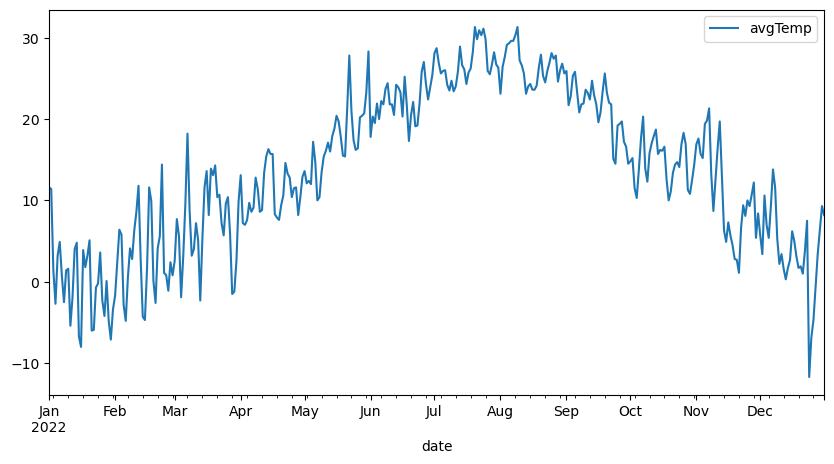

In [17]:
# Plot the time series

df_temp.plot(x='date', y='avgTemp', kind='line', figsize=(10,5))

### 4. Create a column with the count of trips per day and merge it with the weather dataframe.

In [18]:
# Add a helper column to count each trip as 1

df['trip_count'] = 1

In [19]:
# Calculate total trips per day by summing the trip_count column

trip_count = df.groupby('date')['trip_count'].sum()

In [20]:
# Preview the trip_count dataframe

trip_count.head(5)

date
2022-01-01    20198
2022-01-02    42203
2022-01-03    32453
2022-01-04    35869
2022-01-05    33689
Name: trip_count, dtype: int64

In [21]:
# Compute daily trip counts and return them as a dataframe
trip_count = df.groupby('date')['trip_count'].sum().reset_index()

# Rename the trip_count column to total_trips for clarity
trip_count.rename(columns={'trip_count': 'total_trips'}, inplace=True)

In [22]:
# Preview the trip_count dataframe

trip_count.head(5)

,date,total_trips
0,2022-01-01,20198
1,2022-01-02,42203
2,2022-01-03,32453
3,2022-01-04,35869
4,2022-01-05,33689


In [23]:
# Check the trip_count data types

trip_count.dtypes

date           object
total_trips     int64
dtype: object

In [24]:
# Convert the date column to datetime format

trip_count['date'] = pd.to_datetime(trip_count['date'])

In [25]:
# Check again the trip_count data types

trip_count.dtypes

date           datetime64[ns]
total_trips             int64
dtype: object

In [26]:
# Ensure the date columns are parsed as datetime

trip_count['date'] = pd.to_datetime(trip_count['date'])
df_temp['date'] = pd.to_datetime(df_temp['date'])

In [27]:
# Merge daily trip counts with daily average temperature by date

merged_df = pd.merge(
    trip_count,
    df_temp[['date', 'avgTemp']],
    on='date',
    how='left')

In [28]:
# Check Datatypes after merging

merged_df.dtypes

date           datetime64[ns]
total_trips             int64
avgTemp               float64
dtype: object

In [29]:
# Preview the dataframe after merging

merged_df.head(10)

,date,total_trips,avgTemp
0,2022-01-01,20198,11.6
1,2022-01-02,42203,11.4
2,2022-01-03,32453,1.4
3,2022-01-04,35869,-2.7
4,2022-01-05,33689,3.2
5,2022-01-06,44226,4.9
6,2022-01-07,17022,0.7
7,2022-01-08,23866,-2.5
8,2022-01-09,21104,1.4
9,2022-01-10,34172,1.6


In [1]:
# Export the dataframe to CSV file

merged_df.to_csv(os.path.join(path, 'ny_trips_temps.csv'))

NameError: name 'merged_df' is not defined

### 5. Create a line chart of bike trip counts and temperatures plotted on a dual axis.

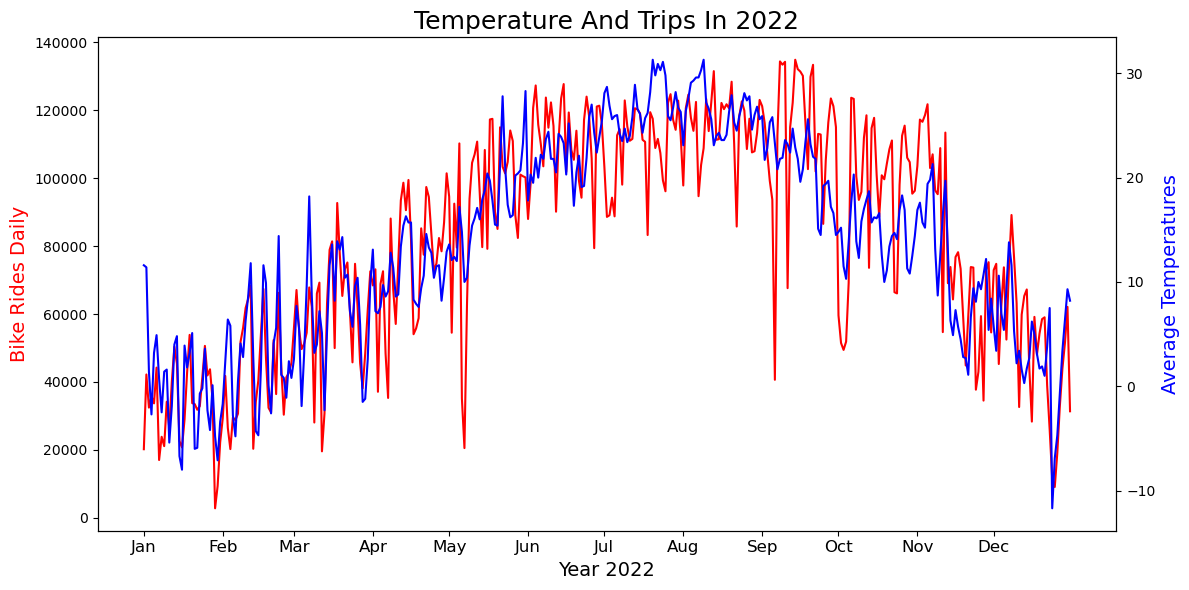

In [30]:
# Create a figure and primary axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot daily trip counts on the primary axis
ax1.plot(merged_df['date'], merged_df['total_trips'], color="red")
ax1.set_xlabel("Year 2022", fontsize=14)
ax1.set_ylabel("Bike Rides Daily", color="red", fontsize=14)

# Add a secondary axis and plot daily average temperatures
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['avgTemp'], color="blue")
ax2.set_ylabel("Average Temperatures", color="blue", fontsize=14)

# Identify all dates that correspond to the first day of each month
month_starts = merged_df.loc[merged_df['date'].dt.day == 1, 'date']

# Set x-axis ticks at month starts and label them with abbreviated month names
ax1.set_xticks(month_starts)
ax1.set_xticklabels(month_starts.dt.strftime('%b'), fontsize=12)

# Add title, adjust layout, and display the final combined plot
plt.title("Temperature And Trips In 2022", fontsize=18)
plt.tight_layout()
plt.show()

### 6. In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

#### To create this dual axis line chart, I used the Object Oriented paradigm. I first created a figure and axes using plt.subplots(), which gave me full control over each plot element.
#### After that, i plotted the daily trip counts on the primary axis (ax1) and then created a secondary y-axis (ax2) using the .twinx() method to plot the temperature data on the same figure.
#### Using the Object Oriented paradigm allowed me to customize labels, colors, and axis properties directly on the ax1 and ax2 objects, which is especially useful for more advanced visualisations like this dual axis charts.
#### This method is generally preferred over the normal procedural style for cleaner code and more advanced control in multi axis plots.

In [35]:
# Export the dataframe to CSV file

df.to_csv(os.path.join(path, 'CB_Data', 'Prepared Data', 'ny_citybike.csv'))